# II. Analysis

### General Analysis

In [1]:
import pandas as pd

reviews_uc = pd.read_csv("polyratings_reviews.csv")
reviews = reviews_uc.drop(reviews_uc[["Unnamed: 0", "Unnamed: 0.1"]], axis = 1) # proper indexing

In [20]:
reviews.head()

,class,class_abrv,class_number,review_content,review_month,review_year,student_gpa,student_grade,student_major,student_rank,student_standing,teacher_difficulties,teacher_field,teacher_name,teacher_presentaion,teacher_rating
0,CPE 215,CPE,215,"he knows what he's talking about, he knows how...",Aug,2001,4.0,A,Required (Major),1,Sophomore,3.64,Computer Science,"Connely, John",3.45,3.41
1,CPE 215,CPE,215,"In two years being here at Cal Poly, Dr Connel...",Aug,2001,4.0,A,Required (Major),1,Sophomore,3.64,Computer Science,"Connely, John",3.45,3.41
2,CPE 215,CPE,215,Connely's an excellent professor. I've had hi...,Aug,2001,3.0,B,Required (Major),2,Junior,3.64,Computer Science,"Connely, John",3.45,3.41
3,CPE 215,CPE,215,"This guy knows what he is talking about, and h...",Aug,2001,4.0,A,Required (Major),1,Sophomore,3.64,Computer Science,"Connely, John",3.45,3.41
4,CPE 215,CPE,215,I could go on and on about how great of a teac...,Dec,1999,4.0,A,Required (Support),2,Junior,3.64,Computer Science,"Connely, John",3.45,3.41


### Activity Over Time

In [144]:
# converting time into an integer to use as a graph index
month_map = { "Jan": 0, "Feb": 1, "Mar": 2, "Apr": 3, 
             "May": 4, "Jun": 5, "Jul": 6, "Aug": 7, 
             "Sep": 8, "Oct": 9, "Nov": 10, "Dec": 11 }

# the site was created in 1999 (the beginning of our graph
reviews["time_int"] = reviews["review_year"].apply(float) + (reviews["review_month"].apply(month_map.get) / 12)

In [145]:
reviews[["review_year", "review_month", "time_int"]].head(10)

,review_year,review_month,time_int
0,2001,Aug,2001.583333
1,2001,Aug,2001.583333
2,2001,Aug,2001.583333
3,2001,Aug,2001.583333
4,1999,Dec,1999.916667
5,2000,Feb,2000.083333
6,2001,Feb,2001.083333
7,2002,Dec,2002.916667
8,2003,Jan,2003.000000
9,2003,Mar,2003.166667


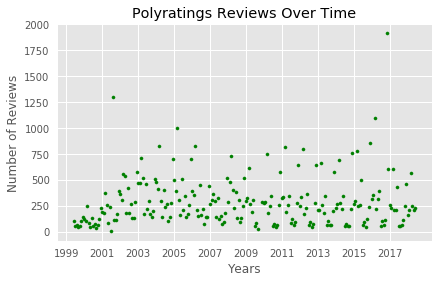

In [219]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")

review_freq = reviews.time_int.value_counts()

plt.scatter(x=list(review_freq.index), y = list(review_freq), s = np.pi * 3, c="g")

plt.xlabel("Years", fontsize = 12)
plt.ylabel("Number of Reviews", fontsize = 12)
plt.title("Polyratings Reviews Over Time")

plt.xticks(np.arange(1999, 2018, 2))

plt.savefig("img/pr_usage.png")

In [209]:
# peak around November 2016? What's that about?

nov2016 = reviews.loc[(reviews.review_year == 2016) & (reviews.review_month == "Nov")]

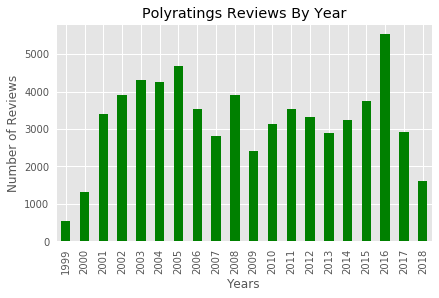

In [224]:
usage_by_year = reviews.review_year.value_counts()
usage_by_year.sort_index().plot.bar(color = "green")

plt.xlabel("Years", fontsize = 12)
plt.ylabel("Number of Reviews", fontsize = 12)

plt.title("Polyratings Reviews By Year")

plt.savefig("img/pr_usage_bar.png")

In [6]:
reviews[reviews["review_year"] == 1999].review_month.value_counts()

Dec    136
Jun    101
Nov     97
Aug     60
Oct     56
Jul     54
Sep     47
Name: review_month, dtype: int64

### Demographics of PolyRatings

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8), sharex=True, sharey=True)

for ax, bldg_type in zip(axes.flatten(), housing["Bldg Type"].unique()):
    housing_type = housing[housing["Bldg Type"] == bldg_type]
    #housing_type.plot.scatter(x="Gr Liv Area", y="SalePrice", ax=ax)
    #ax.set_title(bldg_type)
    ax.set_title(college)